In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get data from yahoo finance 
data = yf.download("VUG BND XLV MCHI VT EWT VGLT IEMG VBK", period="max")["Close"]
data.dropna(inplace=True)
df = pd.concat([data], axis=1)
df.columns = ["VUG", "BND", "XLV", "MCHI", "VT", "EWT", "VGLT", "IEMG", "VBK"]

[*********************100%***********************]  9 of 9 completed


### Info:
- VUG Vanguard Growth ETF (https://investor.vanguard.com/investment-products/etfs/profile/vug)
- BND Vanguard Total Bond Market ETF (https://investor.vanguard.com/investment-products/etfs/profile/bnd#overview)
- XLV Health Care Select Sector SPDR Fund (https://www.sectorspdrs.com/mainfund/xlv)
- MCHI iShares MSCI China ETF (https://www.ishares.com/us/products/239619/ishares-msci-china-etf)
- VT Vanguard Total World Stock ETF (https://investor.vanguard.com/investment-products/etfs/profile/vt)
- EWT Ishares Msci Taiwan ETF (https://www.ishares.com/us/products/239686/ishares-msci-taiwan-etf)
- VGLT Vanguard Long-Term Treasury Index Fund ETF (https://investor.vanguard.com/investment-products/etfs/profile/vglt)
- IEGM iShares Core MSCI Emerging Markets ETF (https://www.ishares.com/us/products/244050/ishares-core-msci-emerging-markets-etf)
- VBK Vanguard Small-Cap Growth ETF (https://investor.vanguard.com/investment-products/etfs/profile/vbk)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2649 entries, 2012-10-24 to 2023-05-05
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BND     2649 non-null   float64
 1   EWT     2649 non-null   float64
 2   IEMG    2649 non-null   float64
 3   MCHI    2649 non-null   float64
 4   VBK     2649 non-null   float64
 5   VGLT    2649 non-null   float64
 6   VT      2649 non-null   float64
 7   VUG     2649 non-null   float64
 8   XLV     2649 non-null   float64
dtypes: float64(9)
memory usage: 207.0 KB


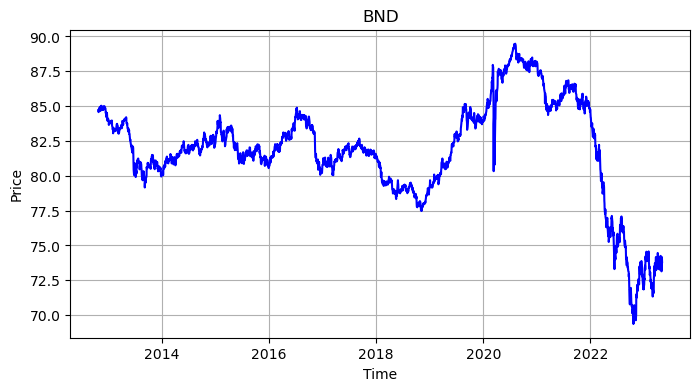

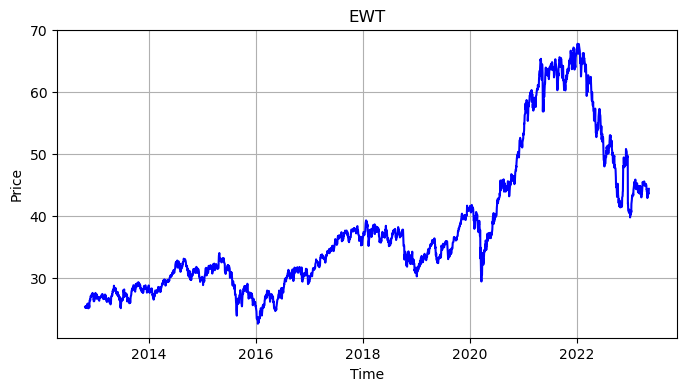

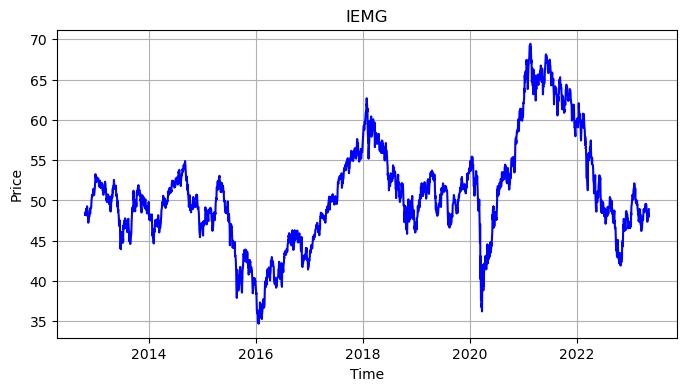

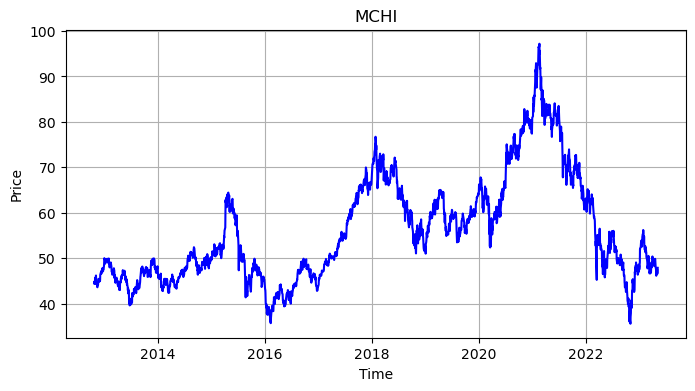

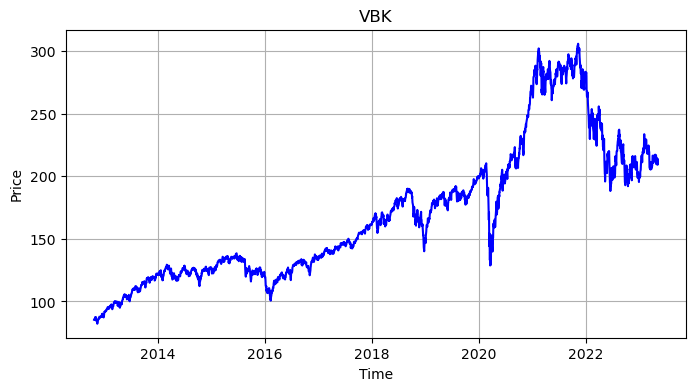

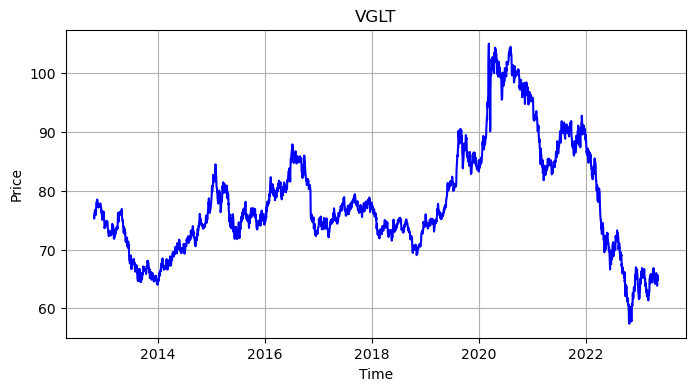

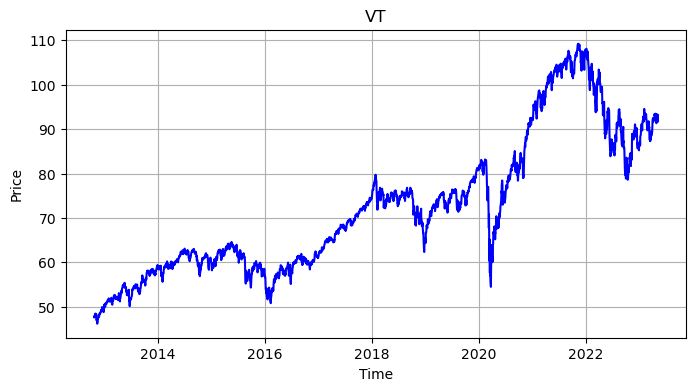

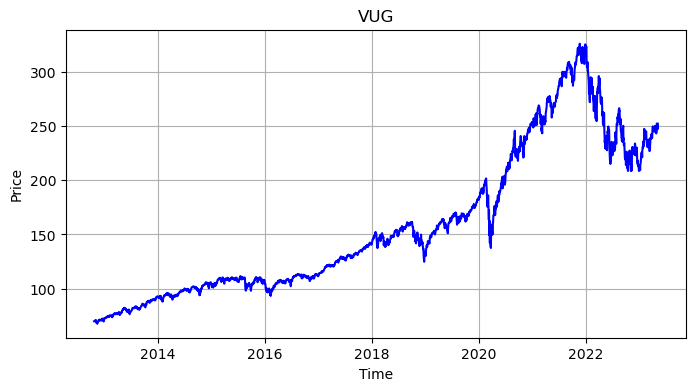

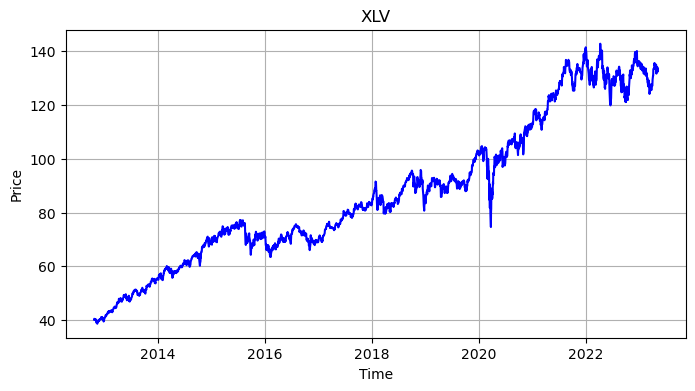

In [4]:
# plotting historical data
for single_data in data:
    plt.figure(figsize=(8, 4), dpi=100)
    plt.plot(data[single_data], color="blue")
    plt.title(single_data)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

In [5]:
# log-returns of the assets
log_returns = np.log(df/df.shift(1))
log_returns.dropna(inplace=True)
log_returns.head(5)

VUG       BND       XLV      MCHI        VT       EWT  \
Date                                                                     
2012-10-25 -0.001654  0.001571  0.006614  0.005814  0.003506 -0.005564   
2012-10-26  0.002126 -0.010257 -0.007237 -0.011888 -0.003271  0.011755   
2012-10-31  0.001651  0.000000  0.000830  0.000902  0.008159  0.007847   
2012-11-01 -0.001533  0.012609  0.015839  0.029322  0.015549 -0.004570   
2012-11-02  0.000354 -0.010232 -0.009020 -0.004828 -0.017291 -0.005117   

                VGLT      IEMG       VBK  
Date                                      
2012-10-25  0.006277  0.000856  0.007937  
2012-10-26 -0.003134  0.000570 -0.003960  
2012-10-31 -0.001047 -0.000713 -0.007218  
2012-11-01  0.014763  0.012611  0.008210  
2012-11-02 -0.010582 -0.009479 -0.005466

In [6]:
log_returns.tail(5)

VUG       BND       XLV      MCHI        VT       EWT  \
Date                                                                     
2023-05-01 -0.012770 -0.005022 -0.003299 -0.003990  0.002897 -0.028258   
2023-05-02  0.009796 -0.003438 -0.008920 -0.018474 -0.017510  0.021996   
2023-05-03  0.004188  0.001147 -0.001251 -0.001931  0.003981  0.006262   
2023-05-04 -0.001349  0.003206  0.008104  0.016821 -0.010986 -0.007949   
2023-05-05 -0.003652  0.014976  0.012136  0.010920  0.020073 -0.004769   

                VGLT      IEMG       VBK  
Date                                      
2023-05-01 -0.001178 -0.001429  0.005154  
2023-05-02 -0.011319 -0.008660 -0.004331  
2023-05-03 -0.003475 -0.005305 -0.001348  
2023-05-04 -0.003487 -0.004968 -0.007974  
2023-05-05  0.016887  0.020600  0.008948

####  Calculating the correlation matrix

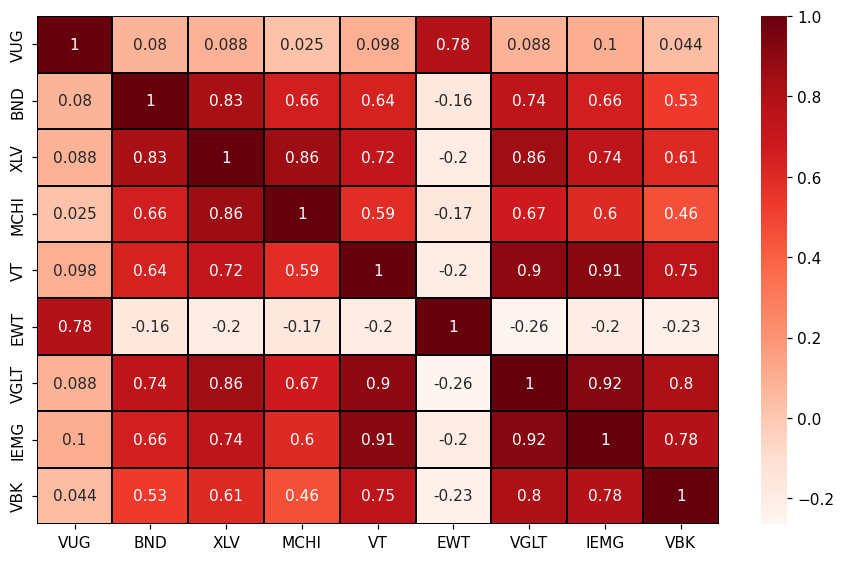

In [7]:
plt.figure(figsize=(10,6), dpi=110)
sns.heatmap(log_returns.corr(), cmap="Reds", linecolor="black", linewidth=0.1, annot=True);

###  Variance of a porfotfolio
<div>
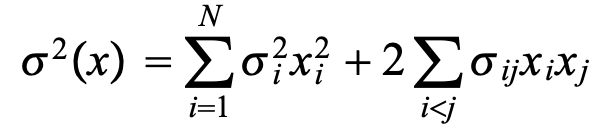
</div>

<div>
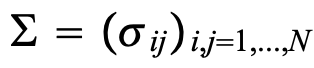
</div>

### Return of a portfolio
<div>
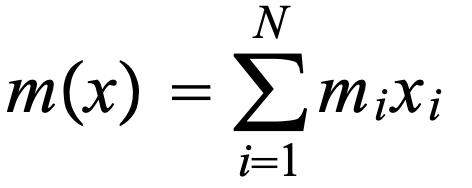
</div>

In [8]:
np.random.seed(70)
n_portfolios = 10000
all_weights = np.zeros((n_portfolios, len(df.columns)))
ret_arr = np.zeros(n_portfolios)
vol_arr = np.zeros(n_portfolios)
sharpe_arr = np.zeros(n_portfolios)


for x in range(n_portfolios):
    # Weights
    weights = np.array(np.random.random(9))
    weights = weights / np.sum(weights)

    # Save weights
    all_weights[x, :] = weights

    # Expected return
    ret_arr[x] = np.sum((log_returns.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x] / vol_arr[x]

print('Max sharpe ratio in the array is: {}'.format(sharpe_arr.max()))
print("It's located in the array: {}".format(sharpe_arr.argmax()))
reddot = (sharpe_arr.argmax())

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

print(all_weights[reddot, :])

Max sharpe ratio in the array is: 0.5751667932743085
It's located in the array: 9907
[0.09245677 0.05478004 0.00409467 0.00185034 0.00483573 0.27611547
 0.06868442 0.24107848 0.25610407]


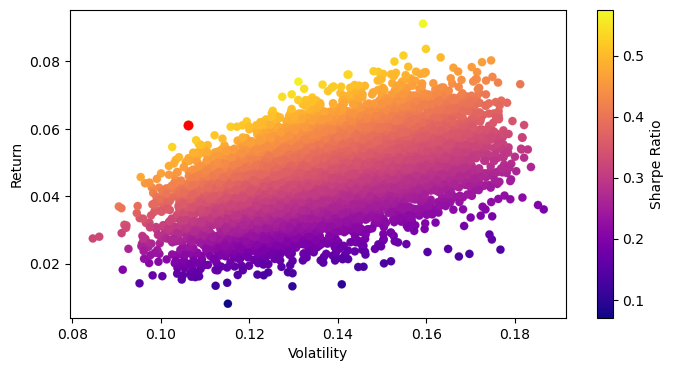

In [9]:
plt.figure(figsize=(8, 4))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma', linewidths=0.1)#random portfolios
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, linewidths=0.1) # red dot
plt.show()


#### plotting with ploty.express

In [10]:
import plotly.express as px

In [11]:
df = pd.DataFrame({'Volatility': vol_arr, 'Return': ret_arr, 'Sharpe Ratio': sharpe_arr.round(2)})
fig = px.scatter(df, x="Volatility", y="Return",
                 color='Sharpe Ratio',title = 'Efficient Frontier')
fig.show()

[back to other projects](Projects/index.html)